In [3]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


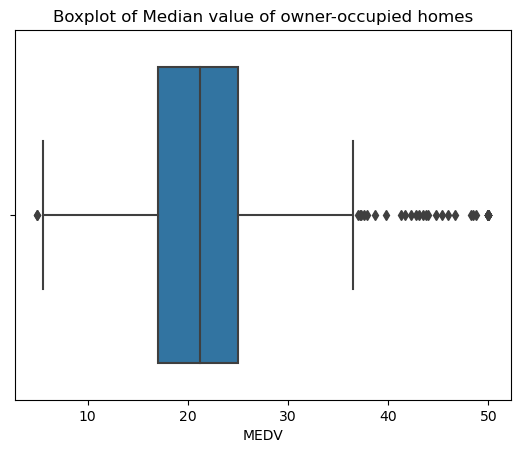

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data frame is named 'df' and the median value column is 'MEDV'
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.show()

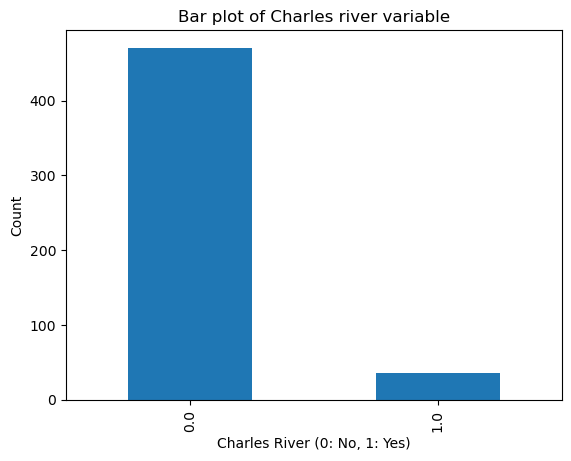

In [5]:
# Assuming Charles river variable is named 'CHAS'
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar plot of Charles river variable')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


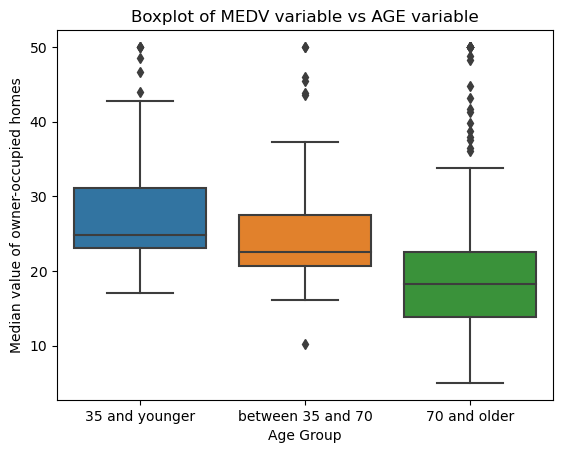

In [6]:
# Assuming AGE variable is named 'AGE'
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', 'between 35 and 70', '70 and older'])
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV variable vs AGE variable')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes')
plt.show()


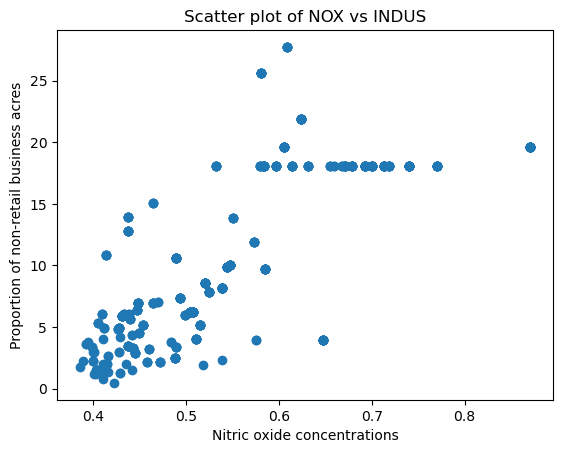

In [7]:
# Assuming NOX is Nitric oxide concentrations and INDUS is the proportion of non-retail business acres
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter plot of NOX vs INDUS')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres')
plt.show()


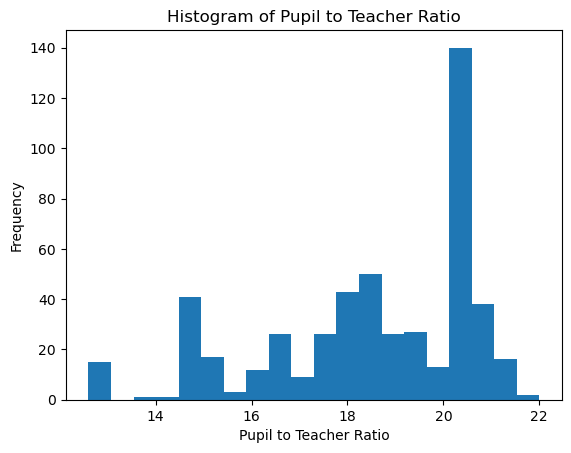

In [8]:
# Assuming PTRATIO is the pupil to teacher ratio variable
boston_df['PTRATIO'].plot(kind='hist', bins=20)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [10]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame and 'MEDV' is the column for median values
charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(charles_river, no_charles_river)

# Check the p-value
if p_value < 0.05:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")


There is a significant difference.


In [11]:
from scipy.stats import f_oneway

# Assuming 'AGE' is the column for the proportion of owner-occupied units built prior to 1940
age_groups = [boston_df['MEDV'][boston_df['AGE_group'] == group] for group in boston_df['AGE_group'].unique()]

f_stat, p_value = f_oneway(*age_groups)

# Check the p-value
if p_value < 0.05:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")


There is a significant difference.


In [12]:
from scipy.stats import pearsonr

# Assuming 'NOX' is the column for Nitric oxide concentrations and 'INDUS' is the column for non-retail business acres
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check the correlation and p-value
print(f"Pearson correlation coefficient: {corr}")
if p_value < 0.05:
    print("There is a significant relationship.")
else:
    print("There is no significant relationship.")


Pearson correlation coefficient: 0.763651446920915
There is a significant relationship.


In [13]:
import statsmodels.api as sm

# Assuming 'DIS' is the column for the weighted distance and 'MEDV' is the column for median values
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        11:16:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0